In [15]:
#!pip install pytesseract

In [31]:
from pdf2image import convert_from_path
import pytesseract
from PIL import Image
#import PyPDF2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Ruta del archivo PDF
archivo_pdf = 'data/CONTRATO_AP000000718.pdf'

# Extraer imágenes del PDF
def extraer_imagenes_pdf(archivo):
    paginas = convert_from_path(archivo)
    num_pagina = 1
    for pagina in paginas:
        imagen_nombre = f'data/pagina{num_pagina}.jpg'
        pagina.save(imagen_nombre, 'JPEG')
        num_pagina += 1

In [3]:
# Extraer texto de las imágenes utilizando OCR
def extraer_texto_imagen(imagen):
    texto = pytesseract.image_to_string(imagen, lang='spa')
    return texto


In [4]:
extraer_imagenes_pdf(archivo_pdf)

In [10]:
imagen_nombre = f'data/pagina{21}.jpg'
imagen = Image.open(imagen_nombre)
texto_por_pag = extraer_texto_imagen(imagen)

In [11]:
texto_por_pag

'01 de Marzo de 2023 $91,870,00\n\n[lo 7 | 01 de Abril de 2023 59187000 |\n\n[sa | 01 de Mayo de 2023\n\nA 01 de Junio de 2023\n)\n\n01 de Julio de.2023 $91,870,00\n\nlo 42 Í|_01de Septiembre de 202\nlas |  0tdeoOctubrede2023 |  $91,870.00 |\n[| 48 | OideNoviembrede2023 [|  $91.870.00 |\n[o 1s | otdeDíciembrede2023 |  $91,870.00 |\nlo 16 |  kOtdeEnerode2024  [  $91,870,.00 |\nlo a7 |  OfdeFebrerode2024. |  $94.87o.00 |\n[| 18 | O1deMarzode2024 |  $91,870.00 |\n\n20\n\n21\naa | oOidéeJuliodezo2a |  $91.870.00 |\n[oa |  OtdeAgostode2024 |  $91,870.00 |\n\nA. PLAZO BASICO:37 MESES\n\nRENTA: $3,075,803.25 (TRES MILLONES SETENTA Y CINCO MIL OCHOCIENTOS TRES\nPESOS 25/100 M.N.)\n\nB. CUENTA BANCARIA.\n\nBANCO SCOTIABANK INV\nRO SCO\n\n044180001041342479\nMONEDA: lO Pesos  _ _____]\n\n€. FECHA DE INICIO: 29 de septiembre de 2022\n\n2/6\n'

In [12]:
texto_completo = ''
chars_by_page = []
num_paginas = len(convert_from_path(archivo_pdf))
for num_pagina in range(1, num_paginas + 1):
    imagen_nombre = f'data/pagina{num_pagina}.jpg'
    imagen = Image.open(imagen_nombre)
    texto = extraer_texto_imagen(imagen)
    chars_by_page.append([num_pagina, len(texto)])
    texto_completo += texto

In [18]:
df_char_page = pd.DataFrame(chars_by_page)
df_char_page.columns = ['page','n_chars']

<Axes: >

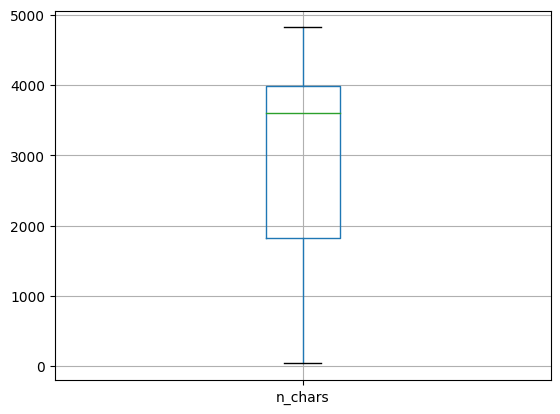

In [32]:
df_char_page[['n_chars']].boxplot()

In [ ]:
texto_completo = ''

num_paginas = len(convert_from_path(archivo_pdf))
for num_pagina in range(1, num_paginas + 1):
    imagen_nombre = f'data/pagina{num_pagina}.jpg'
    imagen = Image.open(imagen_nombre)
    texto = extraer_texto_imagen(imagen)
    #threshold_perc = df_char_page.n_chars.describe(
    #    [.2]
    #)['20%']
    if len(texto)>=0:
        texto_completo += texto
    else:
        print(num_pagina, len(texto))

In [ ]:
len(texto_completo)

In [ ]:
with open('data/ocr_text.txt', 'w') as f:
    f.write(texto_completo)